In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
nltk.download('stopwords')
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


#MANUELA: CHEQUEA QUE TODAS LAS LIBRARIES SEAN IMPORTANTES



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gretalerer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df = pd.read_csv('../datasets/song_data_postEDA.csv')

In [7]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes,track_name_preprocessed,playlist_name_sentiment,track_name_sentiment
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,2oCs0DGTsRO98Gh5ZSl2Cx,7614,2019-06-14,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25,care justin bieber loud luxury remix,0.0,0.10
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,6084,67,63rPSO264uRjW1X5E6cWv6,10410,2019-12-13,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71,memories dillon francis remix,0.0,0.00
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,10416,70,1HoSmj2eLcsrR0vE9gThr4,985,2019-07-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94,time diablo remix,0.0,0.00
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,9215,60,1nqYsOef1yKKuGOVchbsk6,2798,2019-07-19,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82,call mine keanu silva remix,0.0,0.00
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,5402,69,7m7vv9wlQ4i0LFuJiE2zsQ,14843,2019-03-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15,someone loved future humans remix,0.0,0.35


In [16]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format = 'mixed')

# Feature engineering: Adding tempo ranges

In [17]:
# Calculate specific tempo ranges for each zone based on tempo percentiles
tempo_percentiles = df['tempo'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

# Define tempo zones based on these percentiles
def classify_refined_tempo_intensity(row, tempo_ranges):
    if row['tempo'] <= tempo_ranges[0.2]:
        return 'Zone 1 (Very Light)'
    elif row['tempo'] <= tempo_ranges[0.4]:
        return 'Zone 2 (Light)'
    elif row['tempo'] <= tempo_ranges[0.6]:
        return 'Zone 3 (Moderate)'
    elif row['tempo'] <= tempo_ranges[0.8]:
        return 'Zone 4 (Hard)'
    else:
        return 'Zone 5 (Maximum)'

# Apply the refined classification function to the Spotify dataset
df['intensity_zone'] = df.apply(
    lambda row: classify_refined_tempo_intensity(row, tempo_percentiles), axis=1)

# Display the first few rows of the updated Spotify dataset along with the tempo percentiles
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,instrumentalness,liveness,valence,tempo,duration_minutes,track_name_preprocessed,playlist_name_sentiment,track_name_sentiment,intensity_zone,intensity_zone_encoded
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,2oCs0DGTsRO98Gh5ZSl2Cx,7614,2019-06-14,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.000000,0.0653,0.518,122.036,3.25,care justin bieber loud luxury remix,0.0,0.10,Zone 3 (Moderate),2
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,6084,67,63rPSO264uRjW1X5E6cWv6,10410,2019-12-13,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.004210,0.3570,0.693,99.972,2.71,memories dillon francis remix,0.0,0.00,Zone 2 (Light),1
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,10416,70,1HoSmj2eLcsrR0vE9gThr4,985,2019-07-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.000023,0.1100,0.613,124.008,2.94,time diablo remix,0.0,0.00,Zone 3 (Moderate),2
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,9215,60,1nqYsOef1yKKuGOVchbsk6,2798,2019-07-19,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.000009,0.2040,0.277,121.956,2.82,call mine keanu silva remix,0.0,0.00,Zone 3 (Moderate),2
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,5402,69,7m7vv9wlQ4i0LFuJiE2zsQ,14843,2019-03-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.000000,0.0833,0.725,123.976,3.15,someone loved future humans remix,0.0,0.35,Zone 3 (Moderate),2


In [18]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the intensity_zone column and transform the values
df['intensity_zone_encoded'] = encoder.fit_transform(df['intensity_zone'])

# Display the updated dataframe
df.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,instrumentalness,liveness,valence,tempo,duration_minutes,track_name_preprocessed,playlist_name_sentiment,track_name_sentiment,intensity_zone,intensity_zone_encoded
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,66,2oCs0DGTsRO98Gh5ZSl2Cx,7614,2019-06-14,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.000000,0.0653,0.518,122.036,3.25,care justin bieber loud luxury remix,0.0,0.10,Zone 3 (Moderate),2
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,6084,67,63rPSO264uRjW1X5E6cWv6,10410,2019-12-13,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.004210,0.3570,0.693,99.972,2.71,memories dillon francis remix,0.0,0.00,Zone 2 (Light),1
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,10416,70,1HoSmj2eLcsrR0vE9gThr4,985,2019-07-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.000023,0.1100,0.613,124.008,2.94,time diablo remix,0.0,0.00,Zone 3 (Moderate),2
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,9215,60,1nqYsOef1yKKuGOVchbsk6,2798,2019-07-19,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.000009,0.2040,0.277,121.956,2.82,call mine keanu silva remix,0.0,0.00,Zone 3 (Moderate),2
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,5402,69,7m7vv9wlQ4i0LFuJiE2zsQ,14843,2019-03-05,pop remix,37i9dQZF1DXcZDD7cfEKhW,2,...,0.000000,0.0833,0.725,123.976,3.15,someone loved future humans remix,0.0,0.35,Zone 3 (Moderate),2


In [14]:
df.dtypes

track_id                     object
track_name                   object
track_artist                  int64
track_popularity              int64
track_album_id               object
track_album_name              int64
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre                int64
playlist_subgenre             int64
danceability                float64
energy                      float64
key                           int64
loudness                    float64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_minutes            float64
track_name_preprocessed      object
playlist_name_sentiment     float64
track_name_sentiment        float64
intensity_zone               object
intensity_zone_encoded        int64
dtype: object

# Creating Mock User Profiles for Music Recommendation Algorithm


In this part of our project, we aim to generate mock user profiles to facilitate the development and testing of a music recommendation algorithm. Our dataset comprises various features related to songs and playlists, including track IDs, names, artists, popularity, album information, playlist genres, and several musical attributes like danceability, energy, and tempo.


## Objective


The primary objective is to simulate realistic user behavior and preferences regarding their song choices. This simulation will enable us to train and evaluate our recommendation algorithm more effectively, ensuring it can handle real-world scenarios despite using synthetic data.


## Methodology


To create these mock user profiles, we will follow a structured approach that avoids random associations between users and songs. Random assignments might lead to unrealistic user profiles, which could adversely affect the training and performance of our recommendation model. Instead, we employ a K-Nearest Neighbors (KNN) algorithm to ensure that the song preferences attributed to each mock user are coherent and reflect plausible patterns of music consumption. This method involves:


1. **Feature Selection**: Using relevant musical attributes (e.g., danceability, energy) from our dataset to represent songs in a feature space.

2. **Clustering Songs**: Applying the KNN algorithm to group songs based on their similarity in the feature space. This step helps in mimicking how real users might prefer songs that are similar in certain musical aspects.

3. **Generating User Profiles**: Creating mock users by associating them with songs from specific clusters, thereby simulating user preferences for particular types of music. Each user's affinity to a song will be determined based on the proximity of the song to the user's preferred clusters.


## Implementation


We will implement this approach using Python's Pandas library for data manipulation and Scikit-learn for applying the KNN algorithm. This process will result in a set of mock user profiles with realistic song affinities, which can then be used to train and test our recommendation algorithm.


By ensuring that the mock user profiles reflect coherent musical preferences, we aim to create a robust foundation for developing an effective and accurate music recommendation system.


In [21]:
df_knn = df.drop(df.select_dtypes(include=['object']).columns, axis=1) #MANUELA: chequea porque no se importo el dataset con esta columna como datetime
df_knn.head()

,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes,playlist_name_sentiment,track_name_sentiment,intensity_zone_encoded
0,2782,66,7614,2019-06-14,2,3,0.748,0.916,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.25,0.0,0.10,2
1,6084,67,10410,2019-12-13,2,3,0.726,0.815,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.71,0.0,0.00,1
2,10416,70,985,2019-07-05,2,3,0.675,0.931,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.94,0.0,0.00,2
3,9215,60,2798,2019-07-19,2,3,0.718,0.930,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.82,0.0,0.00,2
4,5402,69,14843,2019-03-05,2,3,0.650,0.833,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.15,0.0,0.35,2


In [27]:
df_knn['track_album_release_year'] = df['track_album_release_date'].dt.year
df_knn['track_album_release_month'] = df['track_album_release_date'].dt.month
df_knn['track_album_release_day'] = df['track_album_release_date'].dt.day

# Drop the original 'track_album_release_date' column
df_knn.drop('track_album_release_date', axis=1, inplace=True)


In [28]:
df_knn.head()

,track_artist,track_popularity,track_album_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,speechiness,...,liveness,valence,tempo,duration_minutes,playlist_name_sentiment,track_name_sentiment,intensity_zone_encoded,track_album_release_year,track_album_release_month,track_album_release_day
0,2782,66,7614,2,3,0.748,0.916,6,-2.634,0.0583,...,0.0653,0.518,122.036,3.25,0.0,0.10,2,2019,6,14
1,6084,67,10410,2,3,0.726,0.815,11,-4.969,0.0373,...,0.3570,0.693,99.972,2.71,0.0,0.00,1,2019,12,13
2,10416,70,985,2,3,0.675,0.931,1,-3.432,0.0742,...,0.1100,0.613,124.008,2.94,0.0,0.00,2,2019,7,5
3,9215,60,2798,2,3,0.718,0.930,7,-3.778,0.1020,...,0.2040,0.277,121.956,2.82,0.0,0.00,2,2019,7,19
4,5402,69,14843,2,3,0.650,0.833,1,-4.672,0.0359,...,0.0833,0.725,123.976,3.15,0.0,0.35,2,2019,3,5


In [29]:
df_knn.dtypes

track_artist                   int64
track_popularity               int64
track_album_name               int64
playlist_genre                 int64
playlist_subgenre              int64
danceability                 float64
energy                       float64
key                            int64
loudness                     float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
duration_minutes             float64
playlist_name_sentiment      float64
track_name_sentiment         float64
intensity_zone_encoded         int64
track_album_release_year       int32
track_album_release_month      int32
track_album_release_day        int32
dtype: object

### Normalization: 

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors #manuela: move esto arriba

In [30]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_knn) #MANUELA: CHEQUEA SI ESTO YA FUE SCALED EN EL EDA


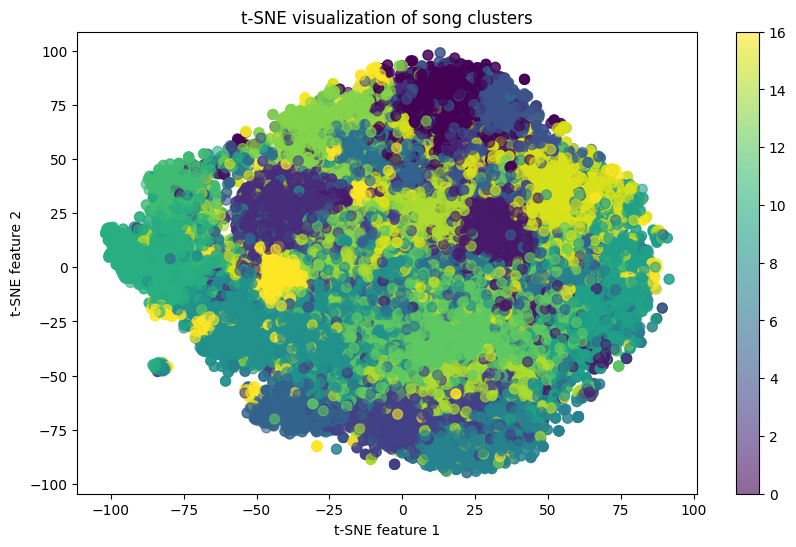

In [33]:
n_clusters = 17 #MANUELA: ENCONTRA EL NUMERO OPTIMO DE CLUSTERS
kmeans = KMeans(n_clusters=n_clusters)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualizing the Clusters with t-SNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar()
plt.title('t-SNE visualization of song clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()



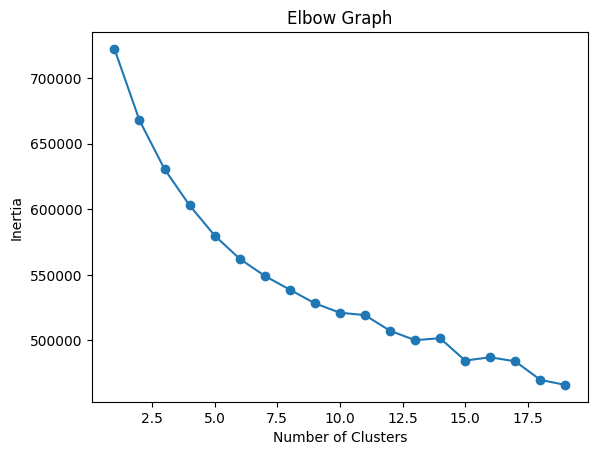

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #MANUELA : mover esto arriba + encontrar el numero optimo de clusters (para eso es este cell)

# Initialize an empty list to store the inertia values
inertia = []

# Define the range of cluster numbers to try
k_values = range(1, 20)

# Iterate over each cluster number
for k in k_values:
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_scaled)
    
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Graph')
plt.show()



In [36]:
import pandas as pd
import numpy as np


num_users = 50
user_preferences = {f'{i}': np.random.choice(range(n_clusters), size=np.random.randint(1, 6), replace=False) for i in range(num_users)}

# Initialize an empty DataFrame for storing user-song assignments
columns = ['user_id'] + list(df.columns)  # Define the columns for the new DataFrame
user_song_df = pd.DataFrame(columns=columns)  # Create the DataFrame

# Assign songs to users based on their cluster preferences
for user_id, prefs in user_preferences.items():
    # Filter songs that match the user's preferences
    preferred_songs_df = df[df['cluster'].isin(prefs)]
    
    # If you want to limit the number of songs per user, adjust the number in .sample(n=...)
    # Here, it's dynamically set to min(10, len(preferred_songs_df))
    sampled_songs_df = preferred_songs_df.sample(n=min(50, len(preferred_songs_df)), replace=True)
    
    # Add a 'user_id' column to the sampled songs DataFrame
    sampled_songs_df['user_id'] = user_id
    
    # Append the user's sampled songs to the main user_song_df DataFrame
    user_song_df = pd.concat([user_song_df, sampled_songs_df], ignore_index=True)

# Reorder the DataFrame to have 'user_id' as the first column
user_song_df = user_song_df[['user_id'] + [col for col in user_song_df.columns if col != 'user_id']]

# Now user_song_df contains each song assigned to a user, including the user_id and all song-related columns


/var/folders/sw/6q2vf2dx0r502xm9jxzvdxzc0000gn/T/ipykernel_51316/2713087455.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  user_song_df = pd.concat([user_song_df, sampled_songs_df], ignore_index=True)


In [37]:
user_song_df.head(70)

,user_id,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,liveness,valence,tempo,duration_minutes,track_name_preprocessed,playlist_name_sentiment,track_name_sentiment,intensity_zone,intensity_zone_encoded,cluster
0,0,0hv6ku4431kPrjbpBBspw3,Animals - Original Mix,6098,5,0N5QcojgdA6aP9oQ7yYG9A,1148,2013-07-01,gym melbourne house,5BqOZpVEqRDfZScvW1QUyA,...,0.3740,0.0376,128.007,5.07,animals original mix,0.000000,0.375,Zone 4 (Hard),3,10
1,0,6uYAPqxP69zfpCbsTHXgiz,Cater 2 U,2462,62,0b6ivSFfDs38MG7aLn9rvO,4221,2004-11-16,hip hop rnb,0Ar0Ng9DlAWZtSPBvOQgOa,...,0.2350,0.4640,125.802,4.09,cater u,0.000000,0.000,Zone 3 (Moderate),2,14
2,0,1gzIbdFnGJ226LTl0Cn2SX,White Wedding - Pt. 1,1083,68,5ebh0MxkqELmk50xHj2b4k,2079,1982-01-01,hard rock cafe,55ybnG2z8rpTIerRfnCsw6,...,0.3430,0.7280,147.193,4.20,white wedding pt,-0.291667,0.000,Zone 5 (Maximum),4,0
3,0,2vX03yHcVtFUg2ZMuzhLhS,Outlaw - Original Mix,5252,0,7jV5akfXEXsoNsqrekDCyX,12116,2014-04-21,latin village,3JcJCsvBnRsA6oc7eUYDSB,...,0.0483,0.8560,127.998,4.81,outlaw original mix,0.000000,0.375,Zone 4 (Hard),3,10
4,0,38LrhW3eQSt3cK88dkvl5e,Misty Night Cruising,5066,33,24sd1ZTrjjabj0A54XK0RP,11054,1984-12-21,city pop シティーポップ,3j2osvmecEao5nmo9jZ5df,...,0.5360,0.5190,146.518,4.46,misty night cruising,0.000000,0.000,Zone 5 (Maximum),4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,4sHR2dZb1GkdgLHS2zTxrm,Run Wild,9560,54,4BrKIRxZaYEh0ZZutEPPpY,13797,2018-08-08,electropop,2Z5cPJ6Z4EVZAfF08amjvL,...,0.6280,0.5760,76.014,2.66,run wild,0.000000,0.100,Zone 1 (Very Light),0,16
66,1,3MOECVkNshqHYTPt5DZcdN,Five More Hours - Deorro x Chris Brown,2441,68,1J6b7W1nSHH7BObK8zIoEY,6490,2017-03-31,pop inglés música en inglés,4QAzO1Z92yqqD6Mf3mOANu,...,0.8170,0.4990,127.961,3.53,five hours deorro x chris brown,0.000000,0.500,Zone 4 (Hard),3,16
67,1,2bfGNzdiRa1jXZRdfssSzR,Dirty Harry,3626,65,0bUTHlWbkSQysoM3VsWldT,4167,2005-05-23,l album rock,0jilq2XZP9F2fwzp2k6iXK,...,0.6720,0.8650,192.296,3.84,dirty harry,0.000000,-0.600,Zone 5 (Maximum),4,16
68,1,3pxIHepHwqAiSq0hLGjKSC,Heaven - Radio Edit,8789,37,14k3JKagBoGg7GJcGBQytq,7023,2019-05-24,trance party future trance,2yofeyPwe0ZNmJHTrGz2Qt,...,0.6600,0.6820,152.015,2.64,heaven radio edit,0.000000,0.000,Zone 5 (Maximum),4,16


In [39]:
user_song_df.to_csv('../datasets/user_song_df.csv', index=False)